# Muon energy loss

The energy loss is modeled as

$$-\frac{dE}{d \varrho} = a(E) + b(E)E$$
where $a$ and $b$ are functions depending on the material properties through which muons propagate. $\varrho(L)$ is the density integrated along the trajectory of the muons (opacity).

Lesparre model the energy loss of muons in standard rock as:

$$\frac{dE}{d\varrho} = -10^{I_4y^4 + I_3y^3 + I_2y^2 +I_1y + I_0}$$

where $y = \log E$, with $E$ in GeV and $l_4 = 0.0154$, $l_3 = −0.0461$,
$l_2 = 0.0368$, $l_1 = 0.0801$, $l_0 = 0.2549$.

The minimum energy for a muon crosses an amounth of rock is

$$E_{min} = \int_0^{\varrho} \frac{dE}{d\varrho}d\varrho + E_{\mu}$$

The integrated flux is then

$$I[\varrho,\theta] = \int_{E_{min}}^{\infty} \Phi(E_0,\theta)dE_0 \ (cm^{-2}sr^{-1}s^{-1})$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.ndimage as ndimage
import re

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

## Particle data group Eloss model

## Energy loss in standard rock

In [2]:
data = np.loadtxt('data/dEdp_PDG.csv')
Groom = np.loadtxt('data/dEdp_Groom.csv')

In [3]:
E = np.linspace(0.01,1e4,10000000) # GeV
y = np.log10(E)
l0 = 0.2549
l1 = 0.0801
l2 = 0.0368
l3 = -0.0461
l4 = 0.0154

dEdp = -10**((l4*y**4) + (l3*y**3)  + (l2*y**2) + l1*y + l0)

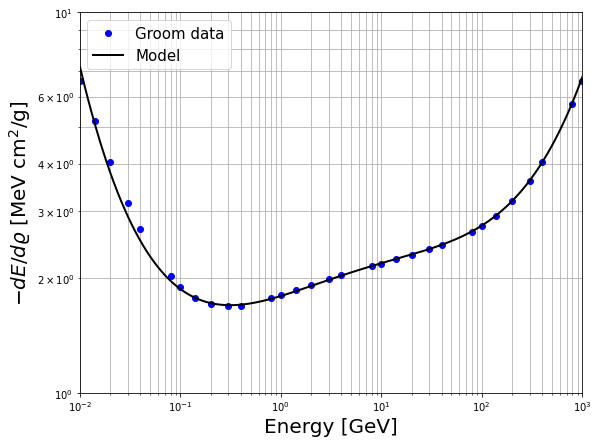

In [4]:
fig = plt.figure(figsize=(9, 7))
#plt.loglog(data[:,0]/1e3, data[:,1], 'or', label = 'Lechmann data')
plt.loglog(Groom[:,0]/1e3, Groom[:,1], 'ob', label = 'Groom data')
plt.loglog(E, -dEdp, '-k', linewidth = 2, label = 'Model')
plt.xlabel("Energy [GeV]", fontsize = 20)
plt.ylabel(r"$-dE/d\varrho$ [MeV cm$^2$/g]", fontsize = 20)
plt.axis([1e-2, 1e3,1,1e1])
plt.legend(loc=2, fontsize=15)
plt.grid(which='both', axis='both')

#plt.savefig('figures/Eloss.eps', format='eps', bbox_inches='tight', pad_inches=0)

plt.show()

##  Error estimation

In [5]:
N = len(Groom[:,0])
error = np.zeros(N)

for i in range(N):
    
    y = np.log10(Groom[i,0]/1e3)
    
    Model = -10**((l4*y**4) + (l3*y**3)  + (l2*y**2) + l1*y + l0)
    error[i] = np.abs(100*(Groom[i,1] + Model)/Groom[i,1])
    #print ('Groom : %f  Model : %f  Error : %f' % (Groom[i,1], Model, error[i]))

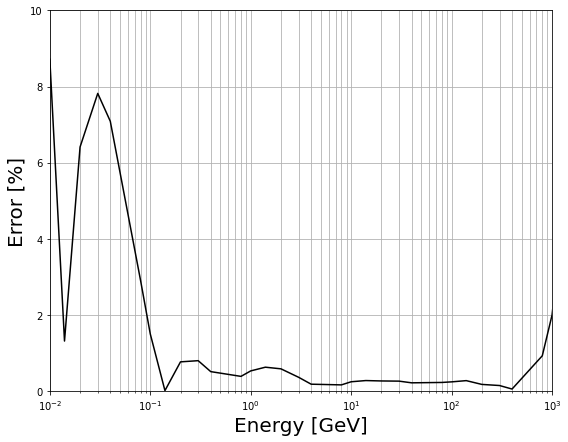

In [6]:
fig = plt.figure(figsize=(9, 7))
plt.semilogx(Groom[:,0]/1e3, error, 'k')
plt.xlabel("Energy [GeV]", fontsize = 20)
plt.ylabel("Error [%]", fontsize = 20)
plt.grid(which='both', axis='both')
plt.axis([1e-2, 1e3,0,10])

#plt.savefig('figures/Eloss_Error.eps', format='eps', bbox_inches='tight', pad_inches=0)

plt.show()

## Opacity

In [7]:
Op = -E*1e3/dEdp

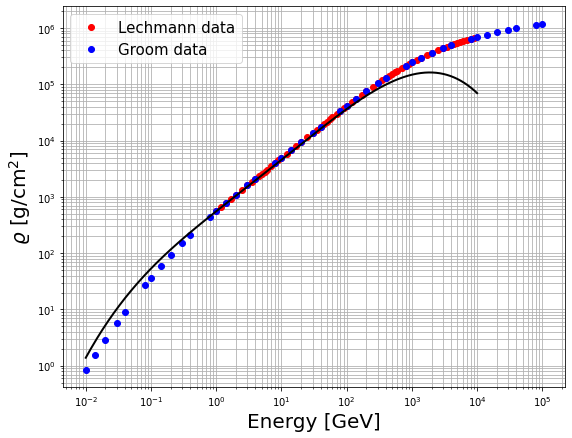

In [34]:
fig = plt.figure(figsize=(9, 7))
plt.loglog(data[:,0]/1e3, data[:,2], 'or', label = 'Lechmann data')
plt.plot(Groom[:,0]/1e3, Groom[:,2], 'ob', label = 'Groom data')
plt.plot(E, Op, 'k', linewidth = 2)
#plt.plot(data[:,0]/1e3, data[:,0]/data[:,1], 'r')
plt.xlabel("Energy [GeV]", fontsize = 20)
plt.ylabel(r"$\varrho$ [g/cm$^2$]", fontsize = 20)
plt.legend(loc=2, fontsize=15)
plt.grid(which='both', axis='both')
plt.show()

In [9]:
rho = 2.65 # g/cm3
Eu = 105.6 # muon mass [eV/c2]

L = Op/rho

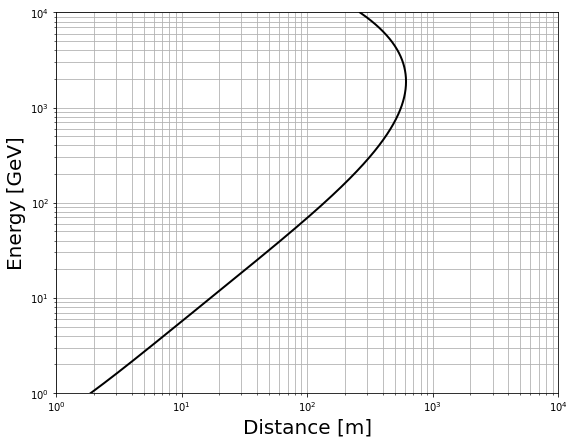

In [10]:
fig = plt.figure(figsize=(9, 7))
plt.loglog(L/100.0, E + Eu/1e3, 'k', linewidth = 2)
plt.xlabel("Distance [m]", fontsize = 20)
plt.ylabel("Energy [GeV]", fontsize = 20)
plt.grid(which='both', axis='both')
plt.axis([1,1e4,1,1e4])
plt.show()

## Emin estimation

In [11]:
from scipy.optimize import minimize

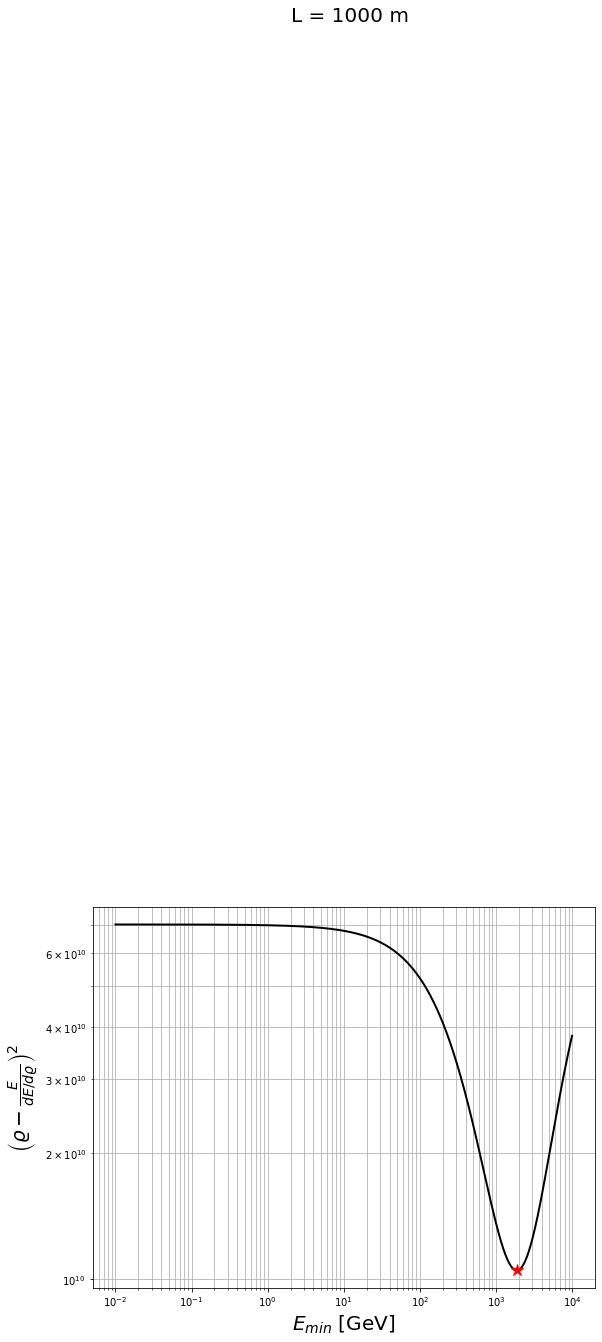

In [31]:
Lm = 1000 # Lenght in m
L = Lm*1e2 # Lenght to cm
rho = 2.65 # Standard rock density g/cm3
p = L*rho # Opacity g/cm2

Eminp = E[np.argmin((Op - p)**2)] - Eu/1e3 # Optimum value
    
fig = plt.figure(figsize=(9, 7))
plt.loglog(E, (Op - p)**2, 'k', linewidth = 2)
plt.plot(Eminp, (Op[np.argmin((Op - p)**2)] - p)**2, marker='*', c='r', markersize=12)
plt.xlabel(r"$E_{min}$ [GeV]", fontsize = 20)
plt.ylabel(r'$\left( \varrho - \frac{E}{dE/d\varrho}\right)^2$', fontsize = 20)
plt.grid(which='both', axis='both')
plt.text(2, 1e13, 'L = ' + str(Lm) + ' m', fontsize = 20 )
plt.show()

In [32]:
print ("Minimum energy : %f GeV , Lenght : %f m" % (E[np.argmin((Op - p)**2)] - Eu/1e3, L/100.0))

Minimum energy : 1877.613710 GeV , Lenght : 1000.000000 m


In [13]:
L = np.linspace(10,2000,100000)

N = len(L)
Emin = np.zeros(N)

for i in range(N):
    p = L[i]*1e2*rho
    Emin[i] = E[np.argmin((Op - p)**2)] - Eu/1e3

KeyboardInterrupt: 

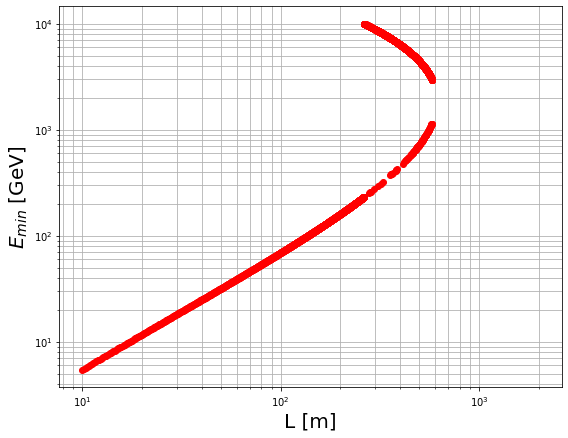

In [14]:
fig = plt.figure(figsize=(9, 7))
plt.loglog(L, Emin, 'or', linewidth = 2)
plt.xlabel(r"L [m]", fontsize = 20)
plt.ylabel(r'$E_{min}$ [GeV]', fontsize = 20)
plt.grid(which='both', axis='both')
plt.show()

## Integrated flux estimation

Once we have the Emin for a given opacity we proceed to estimate the traversing muon flux along the target. For that, we must to integrate the differential muon flux in energy for a given cenithal angle from the Emin to infinity.

$$I(\varrho, \theta) [cm^{-2}s^{-1}sr^{-1}]= \sum_{Emin}^{\infty} \phi(E,\theta)\Delta E \ \frac{GeV}{[GeV cm^2 s sr]}$$

The differential flux $\phi(E, \theta)$ is given by the flux model we chose (Gaiseer, Reyna, Tanaka, Tang...) and the traversing lenght from the ray tracing of the target. The opacity $\varrho(\rho, L)$ depends of the traversing lenght $L$ and material density $\rho$. In this case, for standard rock $\rho = 2.65 g/cm^3$.

### Differnetial flux Bugaev/Reina model

In [14]:
cenith = 30
theta = cenith*np.pi/180.0 # cenith angle / redians
M = 10000
E0 = np.linspace(1e0,1e4,M) # Muon energy / GeV
dE = (1e4-1e0)/M

c = 1 # Speed of light
m0 = 0.1056 # Muon mass in GeV/c^2
p = np.sqrt((E0**2-m0**2*c**4)/c**2) # Bugaev model

y = np.log10(p*np.cos(theta)) # Bugaev/Reyna model
AB = 0.00253
a0 = 0.2455
a1 = 1.288
a2 = -0.2555
a3 = 0.0209
    
Phi_Bugaev_Reyna = AB*(p**(-(a3*y**3 + a2*y**2 + a1*y + a0)))*(np.cos(theta))**3

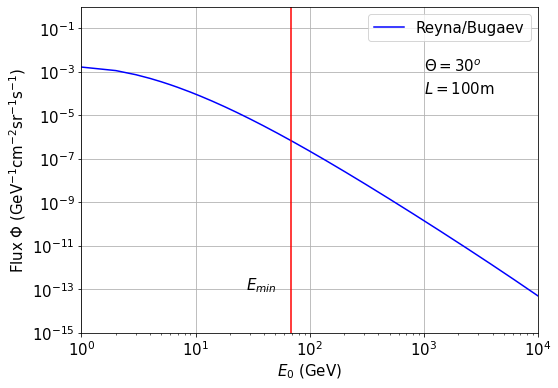

In [15]:
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.loglog(E0,Phi_Bugaev_Reyna, 'b', label='Reyna/Bugaev')
plt.axvline(Eminp, color = 'r')
plt.xlabel("$E_0$ (GeV)", fontsize = 15)
plt.ylabel("Flux $\Phi$ (GeV$^{-1}$cm$^{-2}$sr$^{-1}$s$^{-1}$)", fontsize = 15)
plt.axis([1,1e4,1e-15,1e0])
plt.legend(loc=1, fontsize = 15)
plt.text(1e3,1e-3,'$\Theta =$' + str(cenith) + '$^o$', fontsize = 15)
plt.text(1e3,1e-4,'$L = $' + str(Lm) + 'm', fontsize = 15)
plt.text(Eminp-Eminp*0.6,1e-13,'$E_{min}$', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

In [16]:
N = len(Phi_Bugaev_Reyna)
Int_flux = 0

for i in range(N):
    if E0[i] >= Eminp:
        Int_flux = Int_flux + Phi_Bugaev_Reyna[i]

Int_flux = Int_flux*dE

print ('Cenith : %f grad' % cenith)
print ('Distance : %f m' % Lm)
print ('Traversing muon flux : %f cm-2 sr-1 day-1' % (Int_flux*86400))

Cenith : 30.000000 grad
Distance : 100.000000 m
Traversing muon flux : 2.002504 cm-2 sr-1 day-1


## Fuji muogram estimation

In [18]:
volcano = "data/Machin_P1.dat"

#L_matrix = np.loadtxt('data/Fuji_P1.dat', skiprows=3)  # cenith[rad] azimuth[rad] distance[km] 
L_matrix = np.loadtxt(volcano, skiprows=3)  # cenith[rad] azimuth[rad] distance[km] 

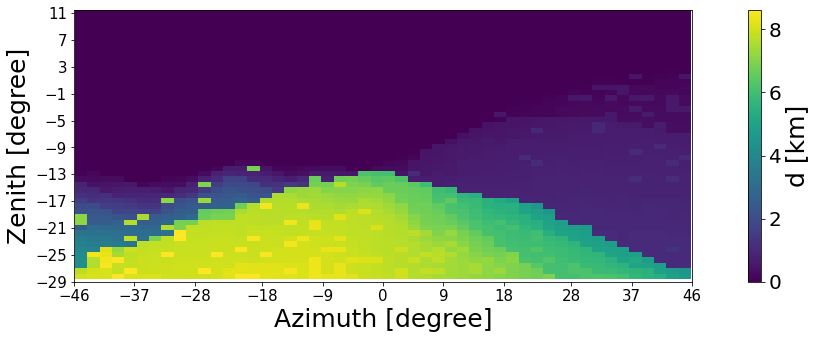

In [19]:
azimuth = L_matrix[:,1]
cenith = L_matrix[:,0]
z = np.abs(L_matrix[:,2].reshape(50,50))

fig = plt.figure(figsize=(20, 5))
extent = (min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, min(cenith)*180/np.pi,max(cenith)*180/np.pi)
plt.imshow(z, interpolation='nearest', extent=extent, origin='upper')
plt.xlabel("Azimuth [degree]", fontsize = 25)
plt.ylabel("Zenith [degree]", fontsize = 25)

# Color bar
clb = plt.colorbar()
clb.set_label('d [km]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

labelsx = np.round(np.linspace(min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, 11),0)
labelsy = np.round(np.linspace(min(cenith)*180/np.pi, max(cenith)*180/np.pi, 11),0)

plt.xticks(labelsx, fontsize = 15)
plt.yticks(labelsy, fontsize = 15)

plt.show()

In [20]:
def int_flux(Lm, theta_in):
    
    # Minimum muon energy estimation
    
    E = np.linspace(1,1e5,100000) # GeV
    y = np.log10(E)
    l0 = 0.2549
    l1 = 0.0801
    l2 = 0.0368
    l3 = -0.0461
    l4 = 0.0154

    dEdp = -10**((l4*y**3.65) + (l3*y**3)  + (l2*y**2) + l1*y + l0)
    
    Op = -E*1e3/dEdp
    
    L = Lm*1e2 # Lenght to cm
    rho = 2.65 # Standard rock density g/cm3
    p = L*rho # Opacity g/cm2

    Eminp = E[np.argmin((Op - p)**2)] - Eu/1e3 
    
    # Muon flux model
    
    cenith = theta_in
    theta = cenith*np.pi/180.0 # cenith angle / redians
    E0 = np.linspace(1e0,1e4,10000) # Muon energy / GeV

    c = 1 # Speed of light
    m0 = 0.1056 # Muon mass in GeV/c^2
    p = np.sqrt((E0**2-m0**2*c**4)/c**2) # Bugaev model

    y = np.log10(p*np.cos(theta)) # Bugaev/Reyna model
    AB = 0.00253
    a0 = 0.2455
    a1 = 1.288
    a2 = -0.2555
    a3 = 0.0209

    Phi_Bugaev_Reyna = AB*(p**(-(a3*y**3 + a2*y**2 + a1*y + a0)))*(np.cos(theta))**3
    
    # Integrated flux estimation
    
    N = len(Phi_Bugaev_Reyna)
    Int_flux = 0
    Open_Sky = 0

    for i in range(N):
        
        Open_Sky = Open_Sky + Phi_Bugaev_Reyna[i]  # Open sky flux
        if E0[i] >= Eminp:
            Int_flux = Int_flux + Phi_Bugaev_Reyna[i] # Traversing flux
            
    Open_Sky = Open_Sky*dE
    Int_flux = Int_flux*dE
    
    return  Int_flux*86400, Open_Sky*86400

## Get cenith angle matrix

In [21]:
cenith_matrix = L_matrix[:,0].reshape(50,50)

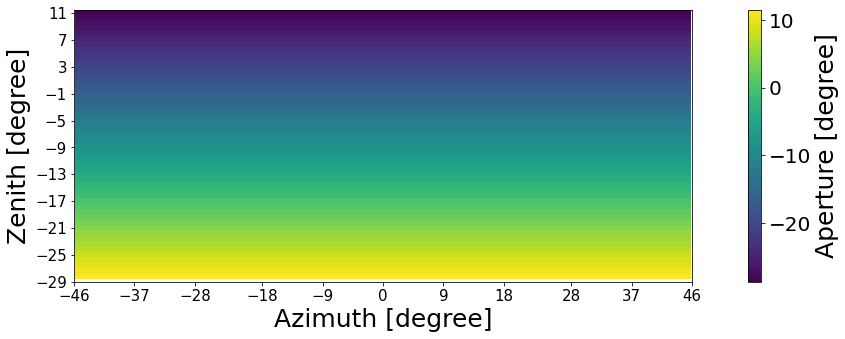

In [22]:
fig = plt.figure(figsize=(20, 5))
extent = (min(azimuth)*180/np.pi, max(azimuth)*180/np.pi,min(cenith)*180/np.pi,max(cenith)*180/np.pi)
plt.imshow(cenith_matrix*180/np.pi, interpolation='nearest', extent=extent, origin='upper')
plt.xlabel("Azimuth [degree]", fontsize = 25)
plt.ylabel("Zenith [degree]", fontsize = 25)

# Color bar
clb = plt.colorbar()
clb.set_label('Aperture [degree]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

labelsx = np.round(np.linspace(min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, 11),0)
labelsy = np.round(np.linspace(min(cenith)*180/np.pi, max(cenith)*180/np.pi, 11),0)

plt.xticks(labelsx, fontsize = 15)
plt.yticks(labelsy, fontsize = 15)

plt.show()

In [23]:
with open(volcano) as f: # Getting the observation point and projection point coordinates from metadata
    for i in range(6):
        line = f.readline()
        line = line.split(' ')
        if line[0] == '#':
            if line[1] == 'Op':
                print (line)
                Latitude1 = float(line[2])
                Longitude1 = float(line[3])
                Altitude1 = float(line[4])
            if line[1] == 'Pp':
                print (line)
                Latitude2 = float(line[2])
                Longitude2 = float(line[3])
                Altitude2 = float(line[4])

['#', 'Op', '4.491984', '-75.380085', '2503.000000', '\n']
['#', 'Pp', '4.487717', '-75.387880', '2712.000000', '\n']


In [24]:
Ce = 40075 # Earth circunference km
X = Ce*(Longitude1-Longitude2)*np.cos((Latitude1-Latitude2)*np.pi/180.0)/360.0 # Lenght Longitud
Y = Ce*(Latitude1-Latitude2)/360.0 # Lenght Latitude
H = np.sqrt(X**2+Y**2)*1000 # Horizontal distance in meters
V = Altitude2 - Altitude1

Elevation = np.arctan(V/H)
print ("Elevation : %f" % (Elevation*180/np.pi))

Elevation : 11.929673


The cenith angle calculation is defined as

$$\theta = 90 - (\phi + \Delta \phi)$$

where $\theta$ is the cenith angle, $\phi$ the telescope elevation angle and $\Delta \phi$ the angular elevation diference 

In [25]:
import timeit

start = timeit.default_timer()

N = 50
Trav_Flux = np.zeros((N,N))
Open_Sky_Flux = np.zeros((N,N))
cenithal = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        cenithal[i,j] = (np.pi/2 - Elevation + cenith_matrix[i,j])*180/np.pi  # Cenith angle in grades

        A, B = int_flux(z[i,j]*1000, cenithal[i,j])
            
        
        Trav_Flux[i,j] = A
        Open_Sky_Flux[i,j] = B 

stop = timeit.default_timer()

print('Time: %f s'% (stop - start))

Time: 67.138796 s


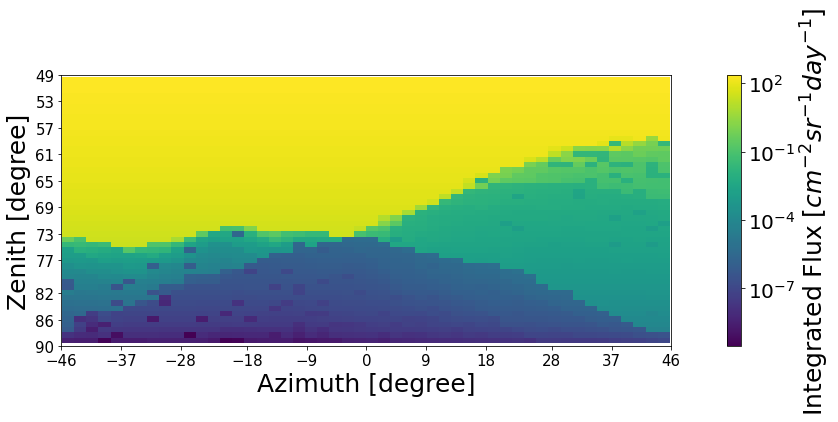

In [26]:
import matplotlib as mpl


fig = plt.figure(figsize=(20, 5))
extent = (min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, np.max(cenithal), np.min(cenithal))
plt.imshow(Trav_Flux, interpolation='nearest', extent=extent, origin='upper',norm=mpl.colors.LogNorm())
plt.xlabel("Azimuth [degree]", fontsize = 25)
plt.ylabel("Zenith [degree]", fontsize = 25)

# Color bar
clb = plt.colorbar()
clb.set_label('Integrated Flux [$cm^{-2}sr^{-1}day^{-1}$]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

labelsx = np.round(np.linspace(min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, 11),0)
labelsy = np.round(np.linspace(np.max(cenithal), np.min(cenithal),  11),0)

plt.xticks(labelsx, fontsize = 15)
plt.yticks(labelsy, fontsize = 15)

plt.show()

## Density estimation

$$\varrho = -\frac{1}{\kappa} \ln \frac{\Phi}{\Phi_0}$$

$$\kappa = \frac{\mu}{\rho}$$

where $\mu$ is the linear attenuation coefficient

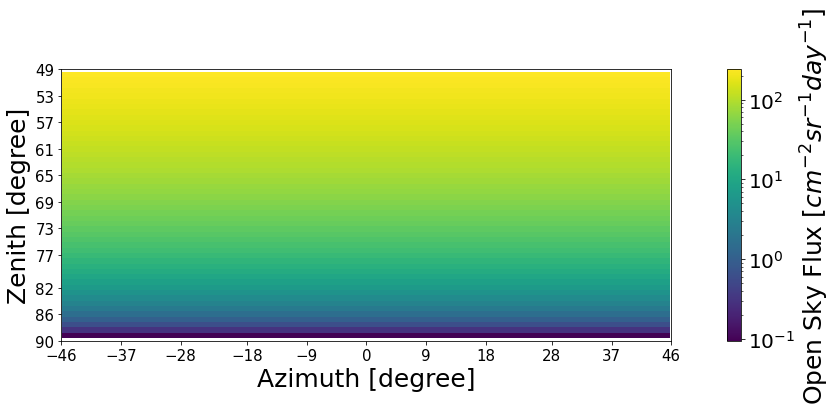

In [67]:
fig = plt.figure(figsize=(20, 5))
extent = (min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, np.max(cenithal), np.min(cenithal))
plt.imshow(Open_Sky_Flux, interpolation='nearest', extent=extent, origin='upper',norm=mpl.colors.LogNorm())
plt.xlabel("Azimuth [degree]", fontsize = 25)
plt.ylabel("Zenith [degree]", fontsize = 25)

# Color bar
clb = plt.colorbar()
clb.set_label('Open Sky Flux [$cm^{-2}sr^{-1}day^{-1}$]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)


labelsx = np.round(np.linspace(min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, 11),0)
labelsy = np.round(np.linspace(np.max(cenithal), np.min(cenithal),  11),0)

plt.xticks(labelsx, fontsize = 15)
plt.yticks(labelsy, fontsize = 15)

plt.show()

In [68]:
Opacity = np.zeros((N,N))
Density = np.zeros((N,N))
R = np.zeros((N,N))

rho = 2.65 # Standard rock density g/cm3

for i in range(N):
    for j in range(N):
        
        if z[i,j] > 0.1:
            
            R[i,j] = Trav_Flux[i,j]/Open_Sky_Flux[i,j]
            mu = np.log(1/R[i,j])/(z[i,j]*1e5)
            kappa = mu/rho

            Opacity[i,j] = (-1/kappa)*np.log(R[i,j])
            Density[i,j] = Opacity[i,j]/(z[i,j]*1e5)

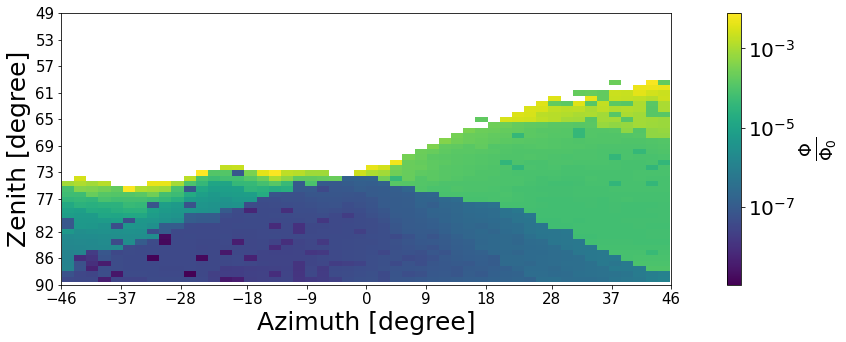

In [69]:
fig = plt.figure(figsize=(20, 5))
extent = (min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, np.max(cenithal), np.min(cenithal))
plt.imshow(R, interpolation='nearest', extent=extent, origin='upper',norm=mpl.colors.LogNorm())
plt.xlabel("Azimuth [degree]", fontsize = 25)
plt.ylabel("Zenith [degree]", fontsize = 25)

# Color bar
clb = plt.colorbar()
clb.set_label(r'$\frac{\Phi}{\Phi_0}$', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

labelsx = np.round(np.linspace(min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, 11),0)
labelsy = np.round(np.linspace(np.max(cenithal), np.min(cenithal),  11),0)

plt.xticks(labelsx, fontsize = 15)
plt.yticks(labelsy, fontsize = 15)

plt.show()

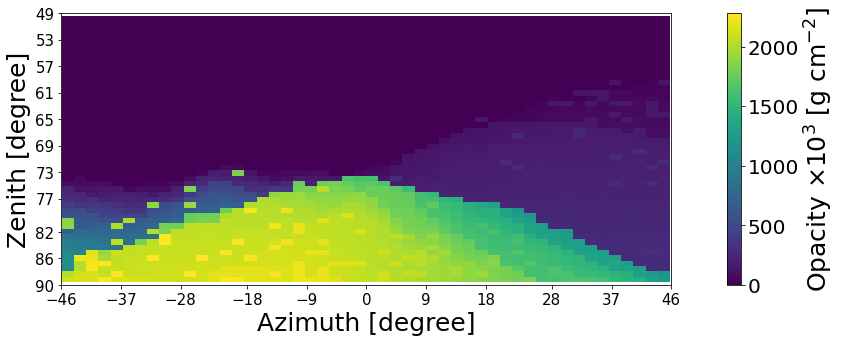

In [70]:
fig = plt.figure(figsize=(20, 5))
extent = (min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, np.max(cenithal), np.min(cenithal))
plt.imshow(Opacity/1e3, interpolation='nearest', extent=extent, origin='upper')
plt.xlabel("Azimuth [degree]", fontsize = 25)
plt.ylabel("Zenith [degree]", fontsize = 25)

# Color bar
clb = plt.colorbar()
clb.set_label(r'Opacity $\times 10^3$ [g cm$^{-2}$]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

labelsx = np.round(np.linspace(min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, 11),0)
labelsy = np.round(np.linspace(np.max(cenithal), np.min(cenithal),  11),0)

plt.xticks(labelsx, fontsize = 15)
plt.yticks(labelsy, fontsize = 15)

plt.show()

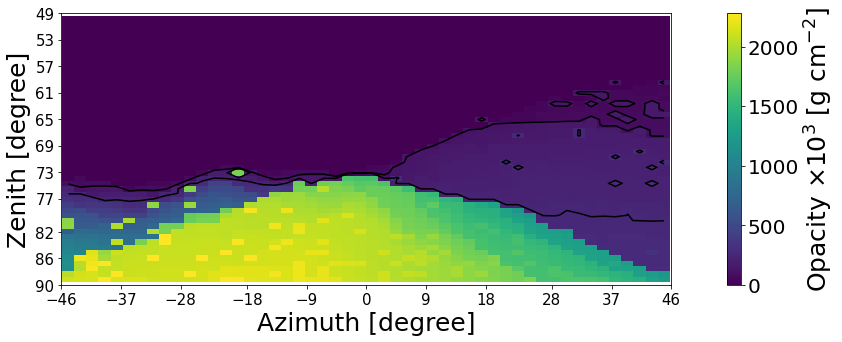

In [71]:
levels = np.arange(-2.0, 2, 0.1)

fig = plt.figure(figsize=(20, 5))
extent = (min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, np.max(cenithal), np.min(cenithal))
plt.imshow(Opacity/1e3, interpolation='nearest', extent=extent, origin='upper')
plt.xlabel("Azimuth [degree]", fontsize = 25)
plt.ylabel("Zenith [degree]", fontsize = 25)

# Color bar
clb = plt.colorbar()
clb.set_label(r'Opacity $\times 10^3$ [g cm$^{-2}$]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

plt.contour(Opacity/1e3, [100,250], colors='k', origin='upper', extent=extent)

labelsx = np.round(np.linspace(min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, 11),0)
labelsy = np.round(np.linspace(np.max(cenithal), np.min(cenithal),  11),0)

plt.xticks(labelsx, fontsize = 15)
plt.yticks(labelsy, fontsize = 15)

plt.show()

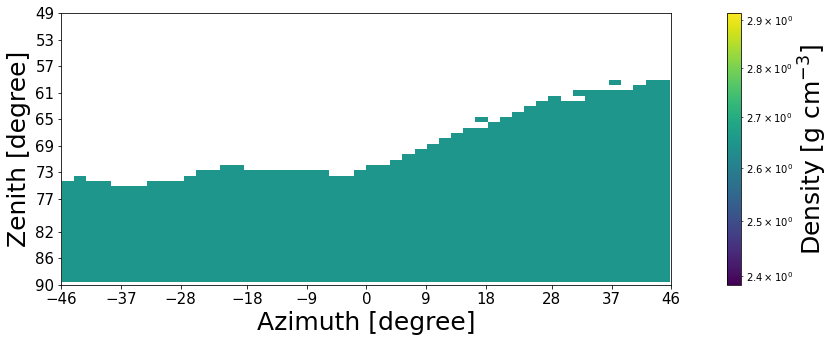

In [72]:
fig = plt.figure(figsize=(20, 5))
extent = (min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, np.max(cenithal), np.min(cenithal))
plt.imshow(Density, interpolation='nearest', extent=extent, origin='upper',norm=mpl.colors.LogNorm())
plt.xlabel("Azimuth [degree]", fontsize = 25)
plt.ylabel("Zenith [degree]", fontsize = 25)

# Color bar
clb = plt.colorbar()
clb.set_label(r'Density [g cm$^{-3}$]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

labelsx = np.round(np.linspace(min(azimuth)*180/np.pi, max(azimuth)*180/np.pi, 11),0)
labelsy = np.round(np.linspace(np.max(cenithal), np.min(cenithal),  11),0)

plt.xticks(labelsx, fontsize = 15)
plt.yticks(labelsy, fontsize = 15)

plt.show()

In [73]:
mean = np.mean(Density[Density != 0])
std = np.std(Density[Density != 0])

print ("Density estimation : %f +- %fe-15" % (mean, std*1e15))

Density estimation : 2.650000 +- 0.400681e-15


## Enhancing function model

In [ ]:
from scipy.optimize import curve_fit

PDG_E = Groom[:,0]/1e3 # Energy in MeV
PDG_dEdx = Groom[:,1] # Energy loss

In [ ]:
def Lesparre(E, a, b, c, d, e): # Lesparre model
    y  = np.log10(E)
    return 10**((a*y**4) + (b*y**3) + (c*y**2) + d*y + e)

In [ ]:
p0 = [0.0154, -0.0461, 0.0368, 0.0801, 0.2549]
popt, pcov = scipy.optimize.curve_fit(Lesparre, PDG_E, PDG_dEdx, p0=p0)
popt

In [ ]:
dEdp_fit = Lesparre(E, *popt)

In [ ]:
fig = plt.figure(figsize=(9, 7))
plt.loglog(PDG_E, PDG_dEdx, 'ob', label = 'PDG data')
plt.plot(E, dEdp_fit, '-k', linewidth = 2, label = 'fit')
plt.xlabel("Energy [GeV]", fontsize = 20)
plt.ylabel("$-dE/dP$ [MeV cm$^2$/g]", fontsize = 20)
plt.legend(loc=2, fontsize=15)
plt.grid(which='both', axis='both')
plt.show()

In [ ]:
Op_fit = E*1e3/dEdp_fit

In [ ]:
fig = plt.figure(figsize=(9, 7))
plt.loglog(data[:,0]/1e3, data[:,2], 'or', label = 'Lechmann data')
plt.loglog(Groom[:,0]/1e3, Groom[:,2], 'ob', label = 'Groom data')
plt.semilogx(E, Op_fit, 'k', linewidth = 2)
plt.semilogx(E, Op, 'g', linewidth = 2)
plt.xlabel("Energy [GeV]", fontsize = 20)
plt.ylabel("p [g/cm$^2$]", fontsize = 20)
plt.legend(loc=2, fontsize=15)
plt.grid(which='both', axis='both')
plt.show()

## Bethe-Bloch formula

$$-\frac{dE}{dx}= K \frac{Zz^2}{A\beta^2} \left[ \ln \frac{2m_ec^2\beta^2\gamma^2T_{max}}{I^2} -2\beta^2 \right]$$

$$2K = 4 \pi N_Ar_e^2m_ec^2 = 0.307 MeVg^{-1}cm^{-2}$$

In [ ]:
c = 3e8 # light speed [m/s]

p = np.linspace(1e-2,1e5,1000000)*1e9/c

m0 = 105.6e6/(c**2) # muon mass [eV/c2]
me= 1

K = 0.307e6 # [MeV/g cm2]
z = 1
Z = 10.0      # Water atomic number
A = 20.0      # Water atomic weight 

gamma_mu = np.sqrt((p/(m0*c))**2+1)
beta_mu = np.sqrt(gamma_mu**2 -1)/gamma_mu

Tmax_mu = 2*me*(c**2)*(beta_mu**2)*(gamma_mu)**2

if (Z<12):
    I = (12.0+7.0/Z)*Z     # Mean excitation energy
else:
    I = (9.76 + 58.8*np.power(Z,-1.19))*Z

print ("Mean excitation energy = %f" % I)

In [ ]:
dEdx_mu = K*(Z/A)*(z**2/beta_mu**2)*(0.5*np.log((2*me*(c**2)*(beta_mu**2)*(gamma_mu**2)*Tmax_mu)/I**2) - beta_mu**2)

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.loglog(Groom[:,0]/1e3, Groom[:,1], 'ob', alpha=0.3, label = 'Groom data')
plt.loglog(p*c/1e9, dEdx_mu/1e6, '-k', lw = 2, label='Bethe-Bloch')
plt.xlabel("p [GeV/c]", fontsize = 20)
plt.ylabel("-dE/dx [Mev/$g.cm^2$]", fontsize = 20)
plt.legend(loc=2, fontsize=15)
plt.grid(which='both', axis='both')
plt.show()